<a href="https://colab.research.google.com/github/UsikaDesu/Capstone-Project-Mood-Detection/blob/main/Image_Classification_Mood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing data from github

In [5]:
!git clone https://github.com/UsikaDesu/Capstone-Project-Mood-Detection.git

Cloning into 'Capstone-Project-Mood-Detection'...
remote: Enumerating objects: 34059, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 34059 (delta 0), reused 6 (delta 0), pack-reused 34053
Receiving objects: 100% (34059/34059), 52.45 MiB | 13.98 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (35888/35888), done.


In [6]:
import os
os.makedirs('data', exist_ok=True)

In [7]:
import shutil
shutil.move('Capstone-Project-Mood-Detection/dataset/train', 'data/train')
shutil.move('Capstone-Project-Mood-Detection/dataset/test', 'data/test')

'data/test'

In [8]:
print("Contents of 'data/train':")
print(os.listdir('data/train'))

print("Contents of 'data/test':")
print(os.listdir('data/test'))

Contents of 'data/train':
['neutral', 'happy', 'surprise', 'angry', 'sad', 'fear', 'disgust']
Contents of 'data/test':
['neutral', 'happy', 'surprise', 'angry', 'sad', 'fear', 'disgust']


# Data Cleaning

In [10]:
import os
from PIL import Image

# Define paths to the train and test directories
train_dir = 'data/train'
test_dir = 'data/test'

# Function to verify directory structure
def verify_directory_structure(directory):
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            print(f"Label directory verified: {label_dir}")
        else:
            print(f"Error: {label_dir} is not a directory")

# Function to remove corrupted images
def remove_corrupted_images(directory):
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for filename in os.listdir(label_dir):
                file_path = os.path.join(label_dir, filename)
                try:
                    with Image.open(file_path) as img:
                        img.verify()  # Check if image is corrupted
                except (IOError, SyntaxError) as e:
                    print(f"Removing corrupted image: {file_path}")
                    os.remove(file_path)

# Function to remove images with unacceptable extensions
def remove_unacceptable_extensions(directory, acceptable_extensions={'jpg', 'jpeg', 'png'}):
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for filename in os.listdir(label_dir):
                if not any(filename.lower().endswith(ext) for ext in acceptable_extensions):
                    file_path = os.path.join(label_dir, filename)
                    print(f"Removing unacceptable image: {file_path}")
                    os.remove(file_path)

# Function to check label consistency
def check_label_consistency(directory):
    label_counts = {}
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            label_counts[label] = len(os.listdir(label_dir))
    return label_counts

# Verify the structure of the train and test directories
verify_directory_structure(train_dir)
verify_directory_structure(test_dir)

# Remove corrupted images from train and test directories
remove_corrupted_images(train_dir)
remove_corrupted_images(test_dir)

# Remove images with unacceptable extensions from train and test directories
remove_unacceptable_extensions(train_dir)
remove_unacceptable_extensions(test_dir)

# Check label consistency for train and test directories
train_label_counts = check_label_consistency(train_dir)
test_label_counts = check_label_consistency(test_dir)

print("Training set label counts:", train_label_counts)
print("Test set label counts:", test_label_counts)


Label directory verified: data/train/neutral
Label directory verified: data/train/happy
Label directory verified: data/train/surprise
Label directory verified: data/train/angry
Label directory verified: data/train/sad
Label directory verified: data/train/fear
Label directory verified: data/train/disgust
Label directory verified: data/test/neutral
Label directory verified: data/test/happy
Label directory verified: data/test/surprise
Label directory verified: data/test/angry
Label directory verified: data/test/sad
Label directory verified: data/test/fear
Label directory verified: data/test/disgust
Training set label counts: {'neutral': 4965, 'happy': 7215, 'surprise': 3171, 'angry': 3995, 'sad': 4830, 'fear': 4097, 'disgust': 436}
Test set label counts: {'neutral': 1233, 'happy': 1774, 'surprise': 831, 'angry': 958, 'sad': 1247, 'fear': 1024, 'disgust': 111}


# Data Analysis

In [13]:
import matplotlib.pyplot as plt

In [14]:
def plot_label_distribution(label_counts, title):
    labels = list(label_counts.keys())
    counts = list(label_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color='skyblue')
    plt.xlabel('Labels')
    plt.ylabel('Number of Images')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

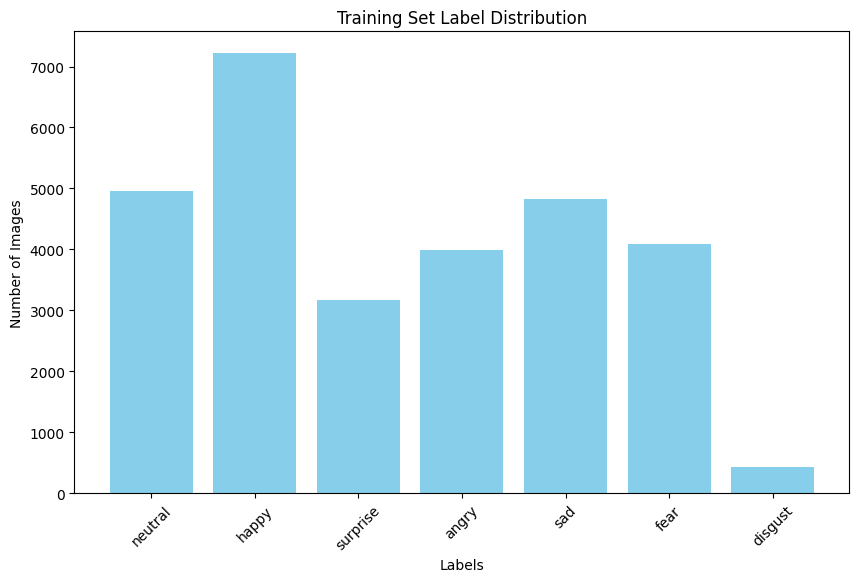

In [15]:
plot_label_distribution(train_label_counts, 'Training Set Label Distribution')

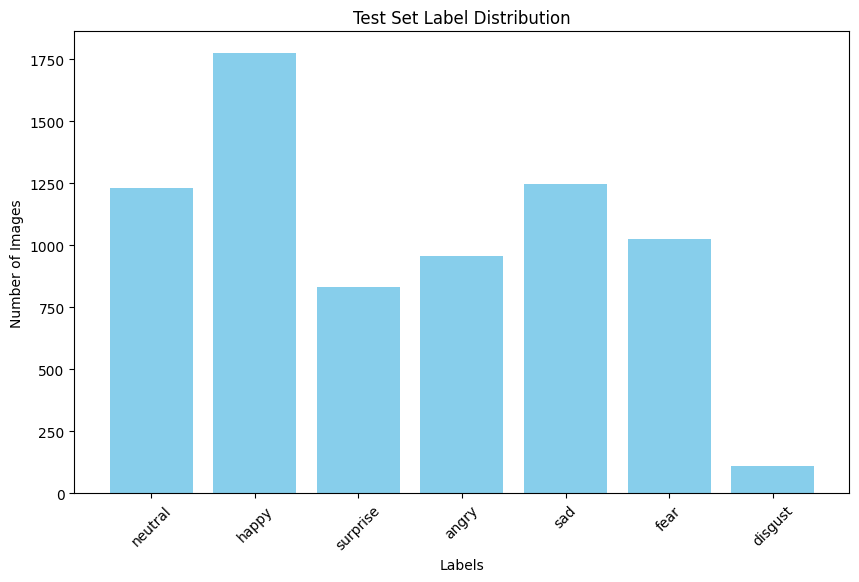

In [16]:
plot_label_distribution(test_label_counts, 'Test Set Label Distribution')

In [28]:
import random
def plot_images_from_each_label(directory, num_images=1):
    labels = os.listdir(directory)

    fig, axes = plt.subplots(1, len(labels), figsize=(20, 5))

    for i, label in enumerate(labels):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            images = os.listdir(label_dir)
            selected_images = random.sample(images, min(len(images), num_images))
            for img_name in selected_images:
                img_path = os.path.join(label_dir, img_name)
                img = Image.open(img_path)
                ax = axes[i]
                ax.imshow(img, cmap='gray')
                ax.set_title(label)
                ax.axis('off')

    plt.tight_layout()
    plt.show()

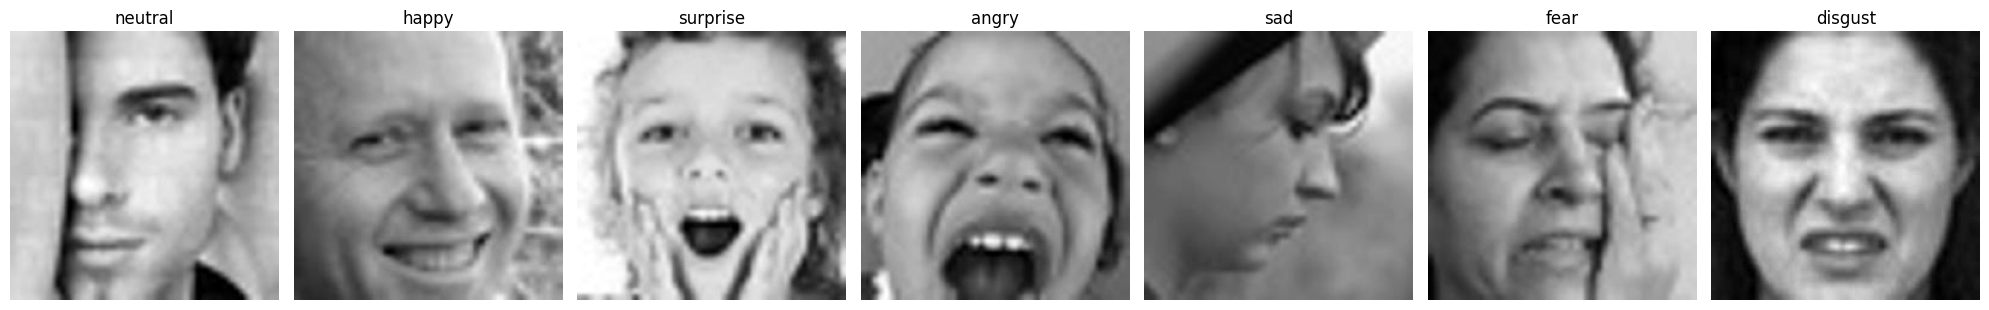

In [29]:
plot_images_from_each_label(train_dir, num_images=1)

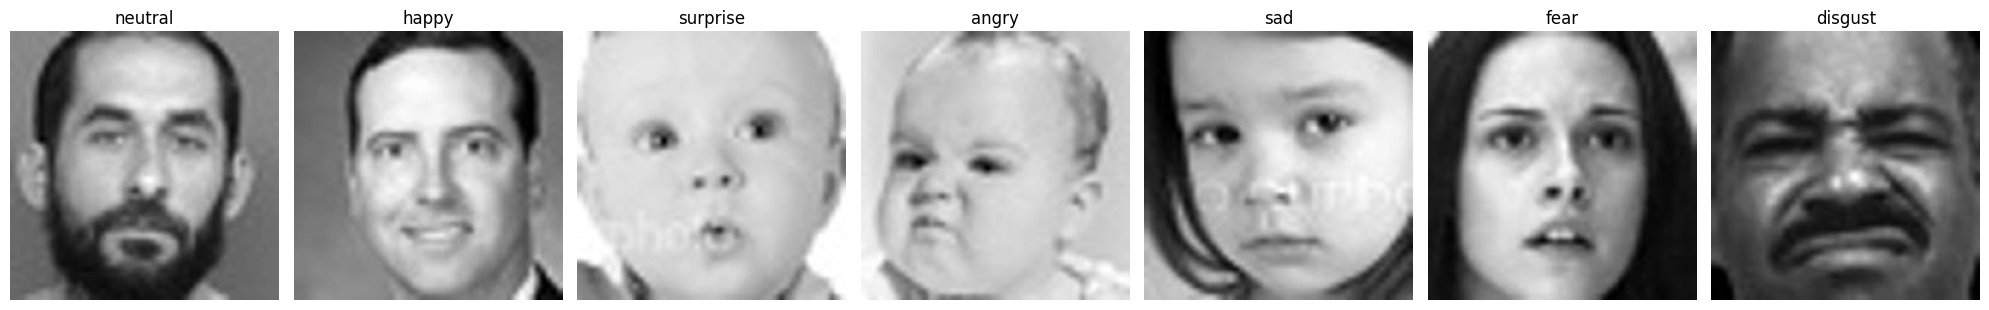

In [30]:
plot_images_from_each_label(test_dir, num_images=1)